In [4]:
import numpy as np
from numpy import cosh, sqrt
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [13]:
# length of pool
L = 60.
# number of cells
N = 500

DX = L / N

def KdV_rhs(t, u):
    '''Returns right hand side of KdV equation, i.e. -6*u*u_x-u_xxx.'''
    term1 = 6 * u * 0.5*(np.roll(u, -1) - np.roll(u, 1))
    term2 = 0.5*(np.roll(u, -2) - np.roll(u, 2)) - np.roll(u, -1) + np.roll(u, 1)
    return -term1/DX - term2/DX**3

In [6]:
def soliton(c, d, x):
    '''Returns shape of 1-soliton solution of velocity c at position d.'''
    return 0.5*c/np.cosh(0.5*sqrt(c)*(x - d))**2

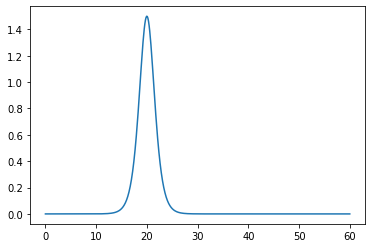

In [18]:
xl = np.linspace(0, L, N)

C = 10
# initial shape u(x,t=0)
u0 = 2*(2+1)/2*soliton(C/10, L/3, xl)

plt.plot(xl, u0)
plt.show()

In [19]:
# time of integration
tmax = 30
# number of time steps
M = N

tl = np.linspace(0, tmax, M)
# call of integrator
sol = solve_ivp(KdV_rhs, [0, tmax], u0, t_eval=tl, method='RK23')

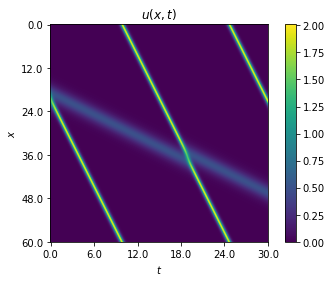

In [20]:
fig, ax = plt.subplots()
im = ax.imshow(sol.y)
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
ax.set_xticks(np.arange(0, M+1, M/5))
ax.set_xticklabels(np.linspace(0, tmax, len(ax.get_xticks())))
ax.set_yticks(np.arange(0, N+1, N/5))
ax.set_yticklabels(np.round(np.linspace(0, L, len(ax.get_yticks()))))
ax.set_title("$u(x,t)$")
fig.colorbar(im, ax=ax)
plt.show()

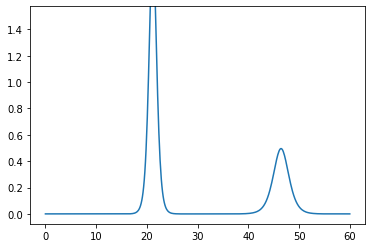

In [21]:
fig, ax = plt.subplots()
line, = ax.plot(xl, u0)

def animate(i):
    line.set_ydata(sol.y[:,i])  # update the data.
    return line,
# make animation
ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=M)
# save animation
ani.save("movie.mp4")